In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    mean_squared_error, r2_score, f1_score
)
import time
from tqdm import tqdm


In [2]:
data=pd.read_csv("../../data/final-data.csv")
df=data.copy()
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,PHID,NPHI,VSH,Bulk Density,PE_filled
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,6.965,16.865,0.191740,2.453403,Original
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,5.465,19.665,0.194048,2.442677,Original
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,5.650,20.450,0.196299,2.434675,Original
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,6.165,20.065,0.216384,2.433603,Original
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,6.550,20.050,0.183564,2.430550,Original


In [3]:
df["Well Name"].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY',
       'CHURCHMAN BIBLE'], dtype=object)

In [4]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'PHID', 'NPHI', 'VSH',
       'Bulk Density', 'PE_filled'],
      dtype='object')

In [5]:
blind = df[df['Well Name'] == 'CHURCHMAN BIBLE']
df = df[df['Well Name'] != 'CHURCHMAN BIBLE']


In [6]:
df["Well Name"].unique()

array(['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A',
       'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY'], dtype=object)

# Feature Selection

In [7]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'PHID', 'NPHI', 'VSH',
       'Bulk Density', 'PE_filled'],
      dtype='object')

In [55]:
# from sklearn.feature_selection import RFE
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt

# # --- Use all candidate features ---
# all_features = [
#     'GR','ILD_log10','DeltaPHI','PHIND','PE',
#     'NM_M','RELPOS','PHID','NPHI','VSH','Bulk Density',
# ]

# # Rebuild train/test with all features
# X_train = df.loc[train_idx, all_features]
# X_test  = df.loc[test_idx, all_features]
# y_train = df.loc[train_idx, target]
# y_test  = df.loc[test_idx, target]

# # Scale again
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled  = scaler.transform(X_test)

# # Store results
# results = []

# for k in range(1, len(all_features)+1):
#     # RFE with k features
#     selector = RFE(RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
#                    n_features_to_select=k)
#     selector = selector.fit(X_train_scaled, y_train)

#     # Selected features for this k
#     selected = np.array(all_features)[selector.support_]

#     # Transform train/test with selected features
#     X_train_sel = selector.transform(X_train_scaled)
#     X_test_sel  = selector.transform(X_test_scaled)

#     # Train new model
#     rf_sel = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
#     rf_sel.fit(X_train_sel, y_train)

#     # Predict + accuracy
#     y_pred_sel = rf_sel.predict(X_test_sel)
#     acc = accuracy_score(y_test, y_pred_sel)

#     results.append((k, acc, selected))

# # Convert to DataFrame for inspection
# results_df = pd.DataFrame(results, columns=["n_features", "accuracy", "selected_features"])
# print(results_df)

# # --- Plot accuracy vs number of features ---
# plt.figure(figsize=(7,5))
# plt.plot(results_df["n_features"], results_df["accuracy"], marker="o")
# plt.xlabel("Number of Features Selected")
# plt.ylabel("Accuracy on Test Wells")
# plt.title("RFE Feature Selection Performance")
# plt.grid(True)
# plt.show()

# # --- Best result ---
# best_idx = results_df["accuracy"].idxmax()
# print("\n✅ Best accuracy:", results_df.loc[best_idx, "accuracy"])
# print("✅ Optimal number of features:", results_df.loc[best_idx, "n_features"])
# print("✅ Selected features:", results_df.loc[best_idx, "selected_features"])


### Train a Baseline Random Forest

In [10]:
features = ["GR", "ILD_log10", "DeltaPHI", "PHIND", "PE",'NM_M', 'RELPOS', 'PHID', 'NPHI', 'VSH','Bulk Density']

#features = ["GR", "ILD_log10", "DeltaPHI", "PHIND", "PE",'NM_M', 'RELPOS', 'PHID', 'NPHI', 'VSH','Bulk Density']
#features= ['GR' ,'ILD_log10', 'PHIND', 'PE', 'NM_M' ,'RELPOS', 'PHID', 'NPHI', 'VSH']
target = "Facies"

X = df[features]
y = df[target]


In [ ]:

# # ================================
# # 3. Train/test split (well-wise)
# # ================================
# wells = df["Well Name"].unique()
# np.random.seed(42)
# np.random.shuffle(wells)

# train_wells = wells[:7]   # train on 7 wells
# test_wells  = wells[7:]   # test on 2 wells

# train_idx = df["Well Name"].isin(train_wells)
# test_idx  = df["Well Name"].isin(test_wells)

# X_train, y_train = X[train_idx], y[train_idx]
# X_test, y_test   = X[test_idx], y[test_idx]


In [13]:
wells = df["Well Name"].unique()

# --- Ensure 'Recruit F9' is always in training ---
mandatory_train = ["Recruit F9"]

# --- Remaining wells (excluding Recruit F9) ---
other_wells = [w for w in wells if w not in mandatory_train]

# --- Shuffle for randomness ---
np.random.seed(42)
np.random.shuffle(other_wells)

# --- 80:20 split on remaining wells ---
split_idx = int(len(other_wells) * 0.8)
train_wells = mandatory_train + list(other_wells[:split_idx])
test_wells  = list(other_wells[split_idx:])

print("Training wells:", train_wells)
print("Testing wells :", test_wells)

# --- Build train/test indices ---
train_idx = df["Well Name"].isin(train_wells)
test_idx  = df["Well Name"].isin(test_wells)

# --- Final X and y ---
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test   = X[test_idx], y[test_idx]


Training wells: ['Recruit F9', 'ALEXANDER D', 'CROSS H CATTLE', 'SHRIMPLIN', 'NEWBY', 'SHANKLE', 'KIMZEY A']
Testing wells : ['LUKE G U', 'NOLAN']


In [14]:

# ================================
# 4. Scale features
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(200, 1000),
    "max_depth": [10, 20, None],
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]
}

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=50, cv=5, scoring="f1_macro", 
    n_jobs=-1, verbose=2, random_state=42
)
random_search.fit(X_train_scaled, y_train)
print("Best Parameters:", random_search.best_params_)
# ================================

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END rf__max_depth=10, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time=   1.9s
[CV] END rf__max_depth=10, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time=   1.9s
[CV] END rf__max_depth=10, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time=   2.0s
[CV] END rf__max_depth=10, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time=   2.1s
[CV] END rf__max_depth=10, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time=   1.7s
[CV] END rf__max_depth=10, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300; total time=   2.3s
[CV] END rf__max_depth=10, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=

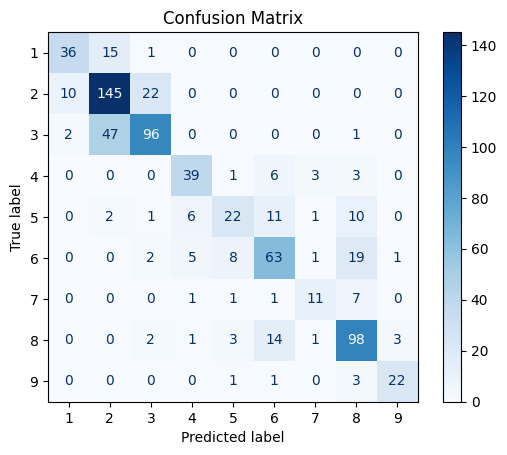

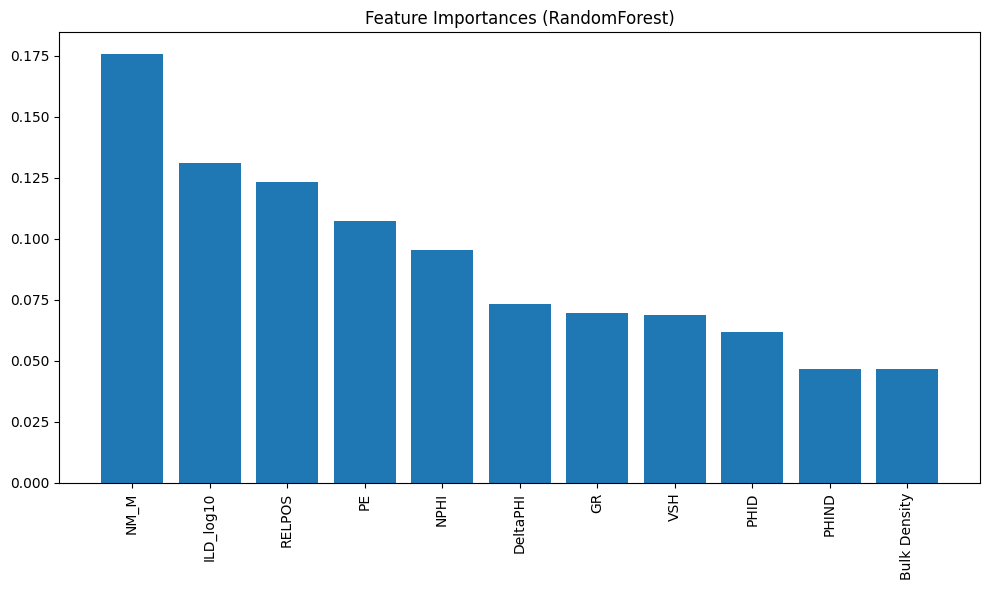

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ================================
# 1. Build pipeline (scaler + RF)
# ================================
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=42))
])

# ================================
# 2. Define parameter grid
# ================================
param_grid = {
    "rf__n_estimators": [200, 300, 500],
    "rf__max_depth": [10, 20, None],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4],
    "rf__max_features": ["sqrt", "log2", None]
}

# ================================
# 3. Multiple scoring metrics
# ================================
scoring = {
    "accuracy": "accuracy",
    "f1_macro": "f1_macro",
    "precision": "precision_macro",
    "recall": "recall_macro"
}

grid = GridSearchCV(
    pipe, param_grid, cv=5, scoring=scoring,
    refit="f1_macro", n_jobs=-1, verbose=2
)

# ================================
# 4. Fit on training data
# ================================
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score (f1_macro):", grid.best_score_)

# ================================
# 5. Evaluate on test set
# ================================
y_pred = grid.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# ================================
# 6. Feature importance plot
# ================================
best_rf = grid.best_estimator_.named_steps["rf"]
importances = best_rf.feature_importances_

sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_idx], align="center")
plt.xticks(range(len(importances)), np.array(X_train.columns)[sorted_idx], rotation=90)
plt.title("Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()


# Train Random Forest 

#### Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 602}


In [27]:

# ================================
# 5. Train Random Forest with progress
# ================================
n_estimators = 602
rf = RandomForestClassifier(
    n_estimators=n_estimators,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
    warm_start=True  # allows incremental training
)

print("\nTraining Random Forest...")
start_time = time.time()
for i in tqdm(range(1, n_estimators+1), desc="Building Trees", unit="tree"):
    rf.n_estimators = i
    rf.fit(X_train_scaled, y_train)
elapsed_time = time.time() - start_time
print(f"\n✅ Training completed in {elapsed_time:.2f} seconds.")



Training Random Forest...


Building Trees:   0%|          | 0/602 [00:00<?, ?tree/s]/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:860: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:860: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to proper


✅ Training completed in 8.95 seconds.


In [20]:

# ================================
# 6. Predict facies
# ================================
print("\nPredicting facies on test wells...")
start_pred = time.time()
y_pred = rf.predict(X_test_scaled)
elapsed_pred = time.time() - start_pred
print(f"✅ Prediction completed in {elapsed_pred:.2f} seconds.")

# Store predictions only for test wells
df["Pred_Facies"] = np.nan
df.loc[test_idx, "Pred_Facies"] = y_pred

# ================================
# 7. Evaluate performance
# ================================
print("\nClassification Report (Test Wells):")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Predicting facies on test wells...
✅ Prediction completed in 0.13 seconds.

Classification Report (Test Wells):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.67      0.71      0.69       235
           3       0.75      0.56      0.64       197
           4       0.72      0.54      0.62        63
           5       0.08      0.04      0.05        49
           6       0.37      0.55      0.45       114
           7       0.45      0.21      0.29        24
           8       0.65      0.54      0.59       190
           9       0.00      0.00      0.00         0

    accuracy                           0.55       876
   macro avg       0.41      0.35      0.37       876
weighted avg       0.61      0.55      0.57       876

Confusion Matrix:
[[  0   4   0   0   0   0   0   0   0]
 [ 37 166  31   0   0   0   0   1   0]
 [  6  72 110   0   0   5   0   4   0]
 [  0   1   0  34   6  17   0   5   0]
 [  0   

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


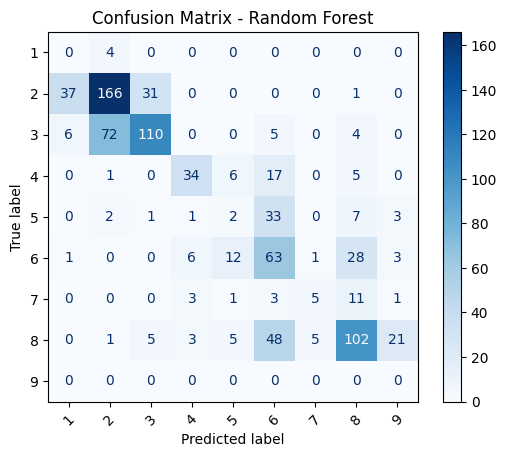


Metrics:
Mean Squared Error (MSE): 1.5936
Root Mean Squared Error (RMSE): 1.2624
R² Score: 0.7044
Weighted F1 Score: 0.5693


In [21]:

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=np.arange(1,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(1,10))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest")
plt.savefig("../../figures/supervised/rf_confusion_matrix.png", dpi=300)
plt.show()

# --- Regression-style metrics ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("\nMetrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

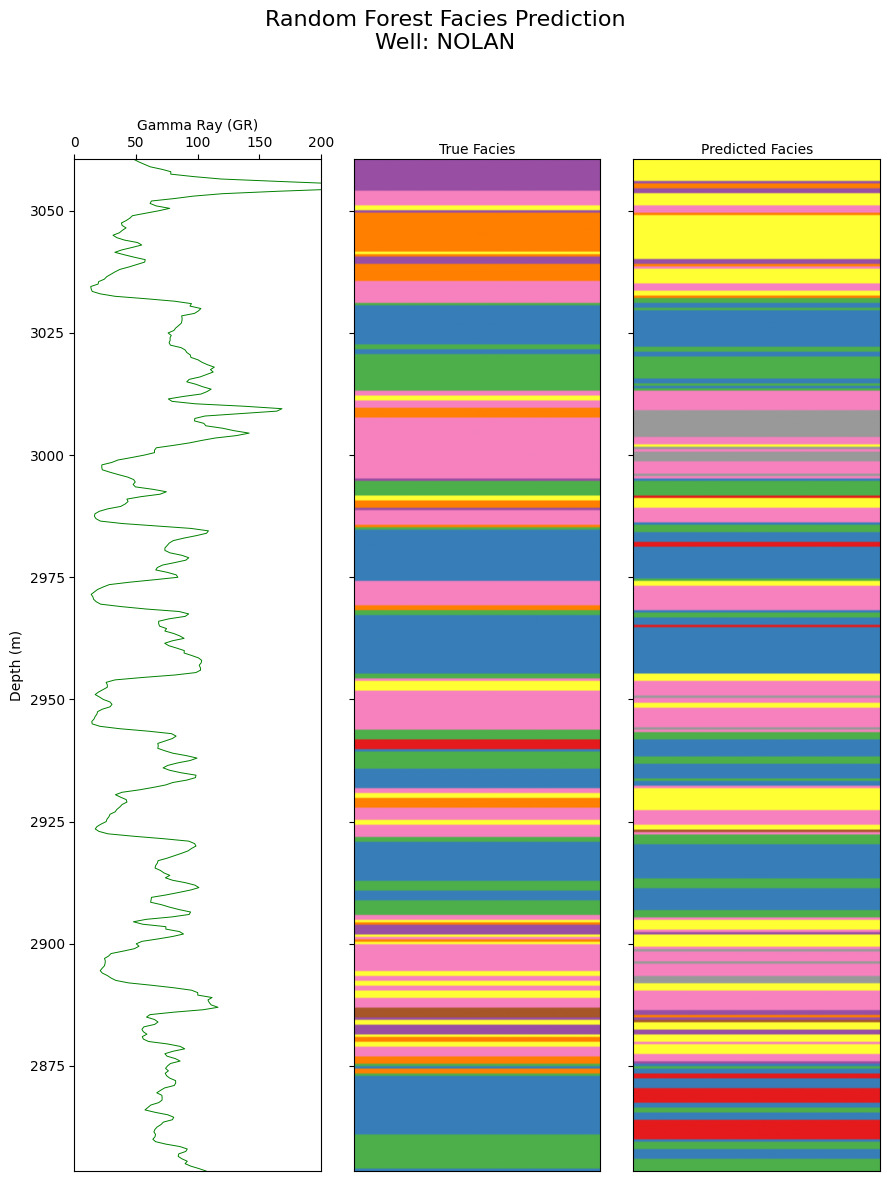

In [22]:

# ================================
# 8. Plot logs + facies tracks
# ================================
def plot_well_facies(df, well_name):
    well = df[df["Well Name"] == well_name].copy().sort_values("Depth")
    if well.empty:
        raise ValueError(f"No data for well {well_name}")

    # --- Facies color setup ---
    facies_colors = [
        '#e41a1c', '#377eb8', '#4daf4a',
        '#984ea3', '#ff7f00', '#ffff33',
        '#a65628', '#f781bf', '#999999'
    ]
    cmap_facies = ListedColormap(facies_colors, name="facies_cmap")
    norm_facies = BoundaryNorm(np.arange(0.5, 10.5, 1), cmap_facies.N)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 12), sharey=True)
    fig.suptitle(f"Random Forest Facies Prediction\nWell: {well_name}", fontsize=16)

    # 1. Gamma Ray
    ax1 = axes[0]
    ax1.plot(well["GR"], well["Depth"], color="green", lw=0.7)
    ax1.set_xlabel("Gamma Ray (GR)")
    ax1.set_xlim(0, 200)
    ax1.set_ylabel("Depth (m)")
    ax1.invert_yaxis()
    ax1.xaxis.set_ticks_position("top")
    ax1.xaxis.set_label_position("top")

    # 2. True Facies
    ax2 = axes[1]
    ax2.imshow(well[["Facies"]].to_numpy(), aspect="auto",
               extent=[0, 1, well["Depth"].max(), well["Depth"].min()],
               cmap=cmap_facies, norm=norm_facies)
    ax2.set_xlabel("True Facies")
    ax2.set_xticks([])
    ax2.invert_yaxis()
    ax2.xaxis.set_ticks_position("top")
    ax2.xaxis.set_label_position("top")

    # 3. Predicted Facies
    ax3 = axes[2]
    ax3.imshow(well[["Pred_Facies"]].to_numpy(), aspect="auto",
               extent=[0, 1, well["Depth"].max(), well["Depth"].min()],
               cmap=cmap_facies, norm=norm_facies)
    ax3.set_xlabel("Predicted Facies")
    ax3.set_xticks([])
    ax3.invert_yaxis()
    ax3.xaxis.set_ticks_position("top")
    ax3.xaxis.set_label_position("top")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f"../../figures/supervised/RF-Prediction {test_wells[1]}.png", dpi=300)

    plt.show()

plot_well_facies(df, well_name=test_wells[1])


# Testing on the blind well

Blind Well Performance (CHURCHMAN BIBLE):
              precision    recall  f1-score   support

           1       0.20      0.12      0.15         8
           2       0.61      0.48      0.54        56
           3       0.57      0.71      0.63        51
           4       0.09      0.15      0.11        13
           5       0.00      0.00      0.00        30
           6       0.52      0.77      0.62        87
           7       1.00      0.09      0.16        34
           8       0.53      0.47      0.50        75
           9       0.83      1.00      0.91        50

    accuracy                           0.55       404
   macro avg       0.48      0.42      0.40       404
weighted avg       0.56      0.55      0.51       404

Confusion Matrix:
[[ 1  6  1  0  0  0  0  0  0]
 [ 4 27 24  0  0  1  0  0  0]
 [ 0  9 36  1  1  0  0  4  0]
 [ 0  0  0  2  2  8  0  1  0]
 [ 0  0  1  3  0 21  0  4  1]
 [ 0  0  0 10  1 67  0  9  0]
 [ 0  0  1  6  0  8  3 13  3]
 [ 0  2  0  0  7 25  0 35

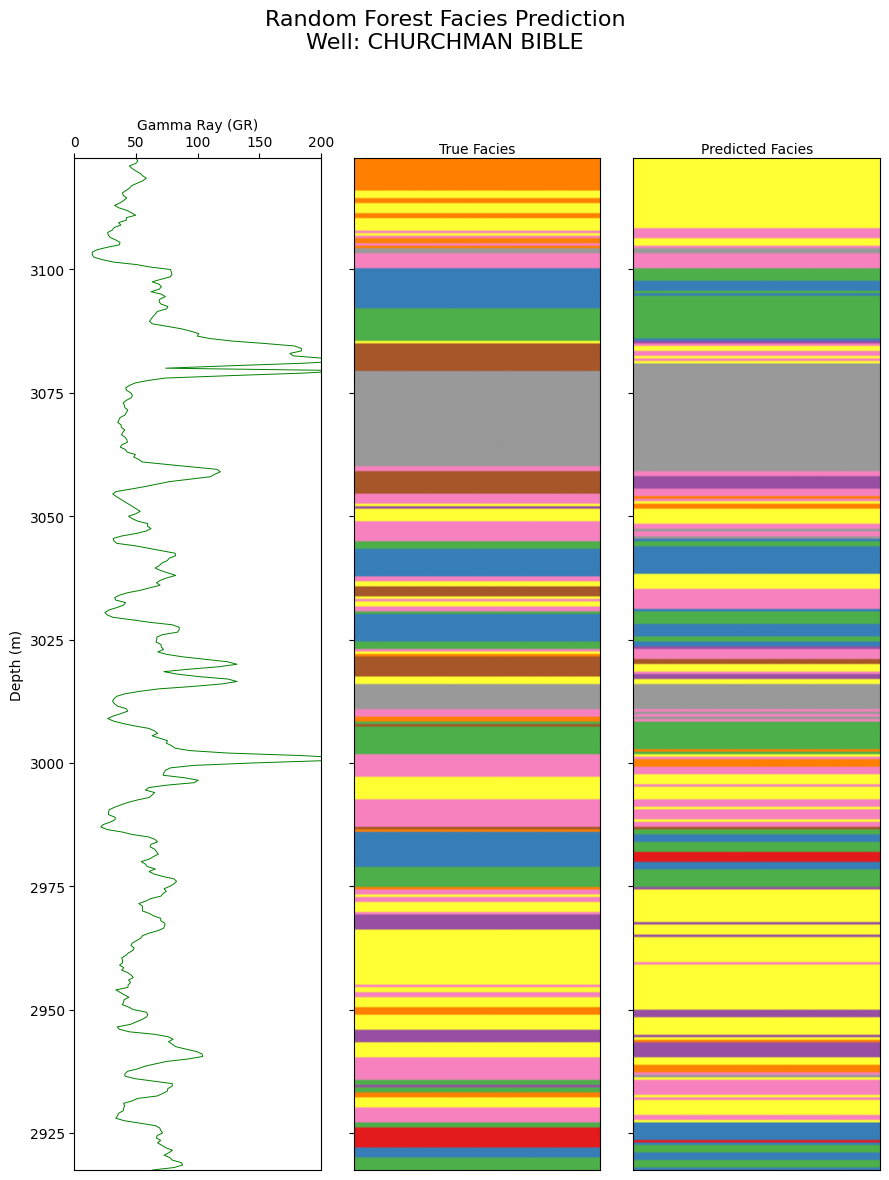

<Figure size 640x480 with 0 Axes>

In [23]:
# Scale blind well using the scaler fitted on training data
X_blind = scaler.transform(blind[features])
y_blind_true = blind["Facies"]

# Predict facies
y_blind_pred = rf.predict(X_blind)

# Store results
blind = blind.copy()
blind["Pred_Facies"] = y_blind_pred

# --- Evaluate ---
from sklearn.metrics import classification_report, confusion_matrix

print("Blind Well Performance (CHURCHMAN BIBLE):")
print(classification_report(y_blind_true, y_blind_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_blind_true, y_blind_pred))

# --- Plot facies tracks ---
plot_well_facies(blind, well_name="CHURCHMAN BIBLE")
plt.savefig(f"../../figures/supervised/RF-Prediction-Blind-well-CHURCHMAN_BIBLE.png", 
            dpi=300, bbox_inches="tight")



Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.69      0.76        52
           2       0.72      0.85      0.78       177
           3       0.78      0.69      0.73       146
           4       0.76      0.75      0.76        52
           5       0.61      0.36      0.45        53
           6       0.58      0.57      0.57        99
           7       0.67      0.48      0.56        21
           8       0.62      0.79      0.70       122
           9       0.86      0.67      0.75        27

    accuracy                           0.70       749
   macro avg       0.72      0.65      0.67       749
weighted avg       0.71      0.70      0.70       749



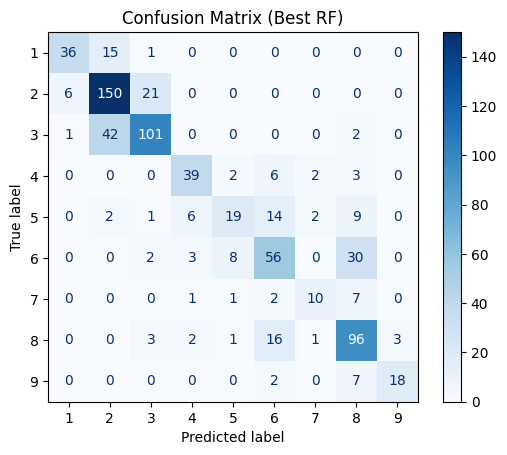

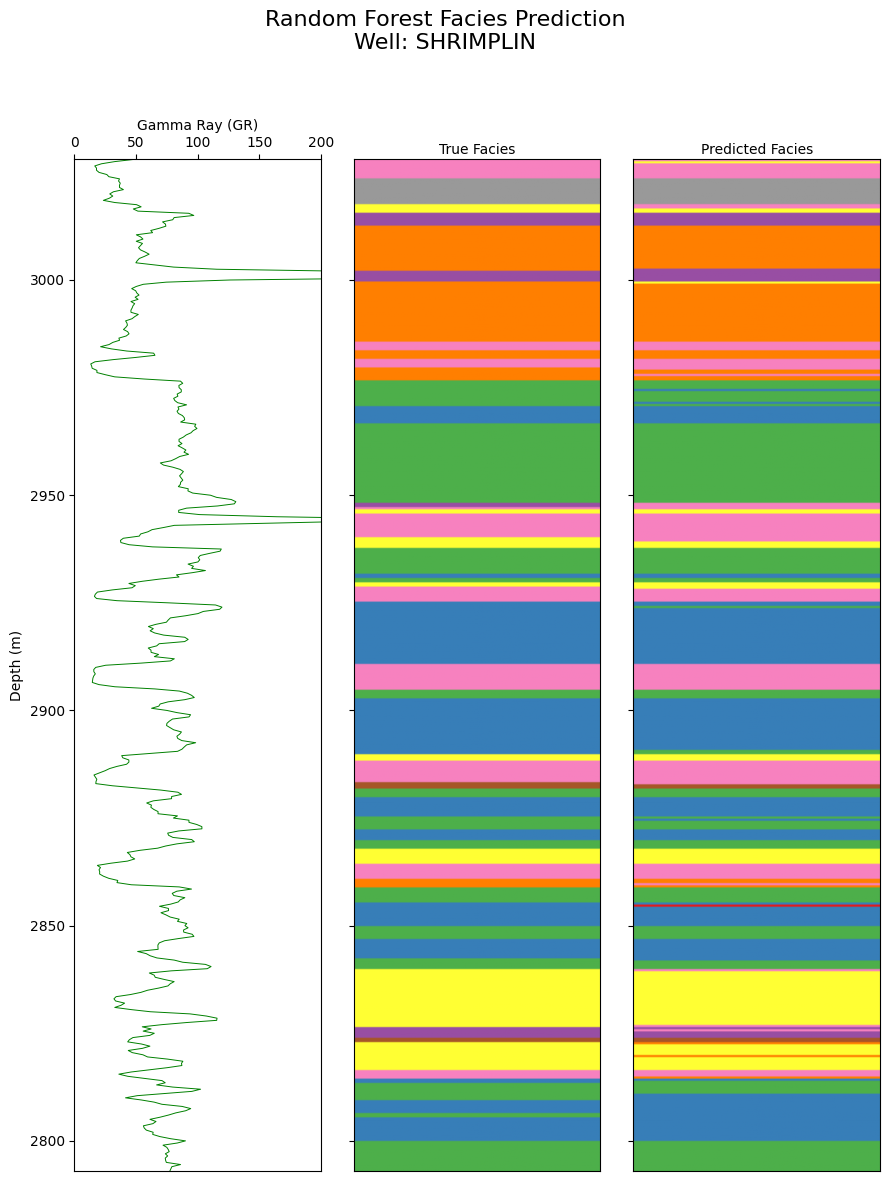

In [33]:
# ================================
# 1. Imports
# ================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ================================
# 2. Features and target
# ================================
features = [
    "GR", "ILD_log10", "DeltaPHI", "PHIND", "PE",
    "NM_M", "RELPOS", "PHID", "NPHI", "VSH", "Bulk Density"
]
target = "Facies"

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================================
# 3. Best RF pipeline
# ================================
best_params = {
    "max_depth": None,
    "max_features": "log2",
    "min_samples_leaf": 3,
    "min_samples_split": 5,
    "n_estimators": 602
}

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(
        **best_params,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
pipe.fit(X_train, y_train)

# Predict facies for full dataset
df["Pred_Facies"] = pipe.predict(X)

# ================================
# 4. Evaluation
# ================================
y_pred = pipe.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Best RF)")
plt.show()

# ================================
# 5. Facies plotting function
# ================================
def plot_well_facies(df, well_name):
    well = df[df["Well Name"] == well_name].copy().sort_values("Depth")
    if well.empty:
        raise ValueError(f"No data for well {well_name}")

    # --- Facies color setup ---
    facies_colors = [
        '#e41a1c', '#377eb8', '#4daf4a',
        '#984ea3', '#ff7f00', '#ffff33',
        '#a65628', '#f781bf', '#999999'
    ]
    cmap_facies = ListedColormap(facies_colors, name="facies_cmap")
    norm_facies = BoundaryNorm(np.arange(0.5, 10.5, 1), cmap_facies.N)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 12), sharey=True)
    fig.suptitle(f"Random Forest Facies Prediction\nWell: {well_name}", fontsize=16)

    # 1. Gamma Ray log
    ax1 = axes[0]
    ax1.plot(well["GR"], well["Depth"], color="green", lw=0.7)
    ax1.set_xlabel("Gamma Ray (GR)")
    ax1.set_xlim(0, 200)
    ax1.set_ylabel("Depth (m)")
    ax1.invert_yaxis()
    ax1.xaxis.set_ticks_position("top")
    ax1.xaxis.set_label_position("top")

    # 2. True Facies track
    ax2 = axes[1]
    ax2.imshow(well[["Facies"]].to_numpy(), aspect="auto",
               extent=[0, 1, well["Depth"].max(), well["Depth"].min()],
               cmap=cmap_facies, norm=norm_facies)
    ax2.set_xlabel("True Facies")
    ax2.set_xticks([])
    ax2.invert_yaxis()
    ax2.xaxis.set_ticks_position("top")
    ax2.xaxis.set_label_position("top")

    # 3. Predicted Facies track
    ax3 = axes[2]
    ax3.imshow(well[["Pred_Facies"]].to_numpy(), aspect="auto",
               extent=[0, 1, well["Depth"].max(), well["Depth"].min()],
               cmap=cmap_facies, norm=norm_facies)
    ax3.set_xlabel("Predicted Facies")
    ax3.set_xticks([])
    ax3.invert_yaxis()
    ax3.xaxis.set_ticks_position("top")
    ax3.xaxis.set_label_position("top")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# ================================
# 6. Example usage
# ================================
# assuming you have a list of test wells
test_wells = df["Well Name"].unique()
# plot one of them:
plot_well_facies(df, well_name=test_wells[0])
